In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/weatherHistory.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


1. Pertama, new_df adalah DataFrame baru yang dibuat dengan menggunakan fungsi loc pada DataFrame asli df. Operasi ini memilih semua baris (ditandai oleh :) dan kolom 'Formatted Date' dan 'Temperature (C)'. Jadi, new_df akan berisi DataFrame dengan dua kolom yaitu 'Formatted Date' dan 'Temperature (C)'.

2. Kedua, df_train adalah DataFrame baru yang dibuat dari DataFrame new_df. Di sini, menggunakan fungsi loc lagi, DataFrame new_df dipotong pada baris 0 hingga 9839 (inklusif) dan hanya memilih kolom 'Formatted Date' dan 'Temperature (C)'. Jadi, df_train akan berisi subset data dari new_df yang terdiri dari 9840 baris pertama dengan kolom 'Formatted Date' dan 'Temperature (C)'.

3. Ketiga, df_val adalah DataFrame lain yang dibuat dari DataFrame new_df. Dalam operasi ini, menggunakan fungsi loc lagi, DataFrame new_df dipotong dari baris 9840 hingga 12299 (inklusif) dan hanya memilih kolom 'Formatted Date' dan 'Temperature (C)'. Jadi, df_val akan berisi subset data dari new_df yang terdiri dari 2459 baris terakhir dengan kolom 'Formatted Date' dan 'Temperature (C)'.

Dengan demikian, df_train dan df_val mewakili dua subset data yang berbeda dari df berdasarkan rentang baris yang ditentukan, yaitu untuk pelatihan dan validasi, masing-masing.

In [5]:
new_df = df.loc[:,['Formatted Date','Temperature (C)']]
df_train =  new_df.loc[:9839,['Formatted Date','Temperature (C)']]
df_val = new_df.loc[9840:12299,['Formatted Date','Temperature (C)']]

In [6]:
new_df

,Formatted Date,Temperature (C)
0,2006-04-01 00:00:00.000 +0200,9.472222
1,2006-04-01 01:00:00.000 +0200,9.355556
2,2006-04-01 02:00:00.000 +0200,9.377778
3,2006-04-01 03:00:00.000 +0200,8.288889
4,2006-04-01 04:00:00.000 +0200,8.755556
...,...,...
96448,2016-09-09 19:00:00.000 +0200,26.016667
96449,2016-09-09 20:00:00.000 +0200,24.583333
96450,2016-09-09 21:00:00.000 +0200,22.038889
96451,2016-09-09 22:00:00.000 +0200,21.522222


In [7]:
df_train

,Formatted Date,Temperature (C)
0,2006-04-01 00:00:00.000 +0200,9.472222
1,2006-04-01 01:00:00.000 +0200,9.355556
2,2006-04-01 02:00:00.000 +0200,9.377778
3,2006-04-01 03:00:00.000 +0200,8.288889
4,2006-04-01 04:00:00.000 +0200,8.755556
...,...,...
9835,2007-08-21 19:00:00.000 +0200,28.772222
9836,2007-08-21 20:00:00.000 +0200,25.877778
9837,2007-08-21 21:00:00.000 +0200,23.750000
9838,2007-08-21 22:00:00.000 +0200,22.105556


In [15]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9840 entries, 0 to 9839
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Formatted Date   9840 non-null   object 
 1   Temperature (C)  9840 non-null   float64
dtypes: float64(1), object(1)
memory usage: 153.9+ KB


In [8]:
df_train.isnull().sum()

Formatted Date     0
Temperature (C)    0
dtype: int64

In [9]:
df_val

,Formatted Date,Temperature (C)
9840,2007-08-22 00:00:00.000 +0200,21.483333
9841,2007-08-22 01:00:00.000 +0200,19.933333
9842,2007-08-22 02:00:00.000 +0200,21.833333
9843,2007-08-22 03:00:00.000 +0200,18.866667
9844,2007-08-22 04:00:00.000 +0200,18.266667
...,...,...
12295,2007-01-05 07:00:00.000 +0100,2.466667
12296,2007-01-05 08:00:00.000 +0100,2.316667
12297,2007-01-05 09:00:00.000 +0100,2.966667
12298,2007-01-05 10:00:00.000 +0100,5.927778


In [10]:
df_val.isnull().sum()

Formatted Date     0
Temperature (C)    0
dtype: int64

In [11]:
# Mengambil nilai kolom 'Formatted Date' dari df dan menyimpannya ke dalam array dates
dates = df['Formatted Date'].values
# Mengambil nilai kolom 'Temperature (C)' dari df dan menyimpannya ke dalam array temp
temp  = df['Temperature (C)'].values

# Mengambil nilai kolom 'Formatted Date' dari df_train dan menyimpannya ke dalam array dates_train
dates_train = df_train['Formatted Date'].values
# Mengambil nilai kolom 'Temperature (C)' dari df_train dan menyimpannya ke dalam array temp_train
temp_train  = df_train['Temperature (C)'].values

# Mengambil nilai kolom 'Formatted Date' dari df_val dan menyimpannya ke dalam array dates_val
dates_val = df_val['Formatted Date'].values
# Mengambil nilai kolom 'Temperature (C)' dari df_val dan menyimpannya ke dalam array temp_val
temp_val  = df_val['Temperature (C)'].values

Text(0.5, 1.0, 'Temperature from Training and Validation Data')

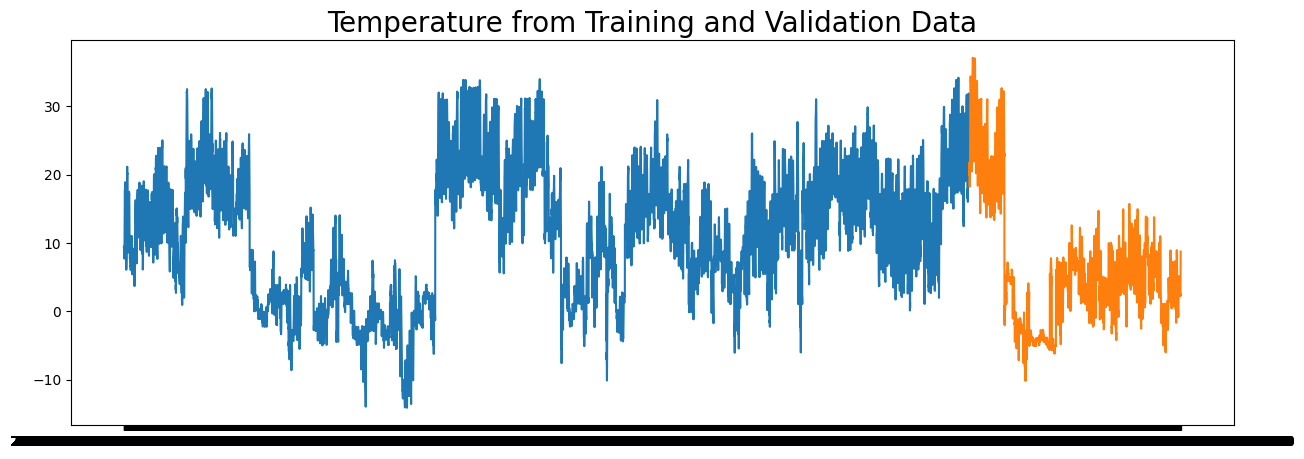

In [12]:
# Mengatur ukuran plot menjadi 15x5
plt.figure(figsize=(15,5))

# Menggambar plot dari data pelatihan dengan sumbu x sebagai tanggal dan sumbu y sebagai suhu
plt.plot(dates_train,temp_train)

# Menambahkan plot dari data validasi ke dalam plot yang sudah ada
plt.plot(dates_val,temp_val)

# Menetapkan judul plot "Temperature" dengan ukuran font 20
plt.title("Temperature from Training and Validation Data",
          fontsize=20)

In [13]:
pip install sklearn

  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post11-py3-none-any.whl size=2959 sha256=679d0a2188366ea4b32f51a54cc0306b50f04db3eb6573971bd5ae5a73f7ce19
  Stored in directory: /root/.cache/pip/wheels/aa/9c/60/f67813603a52fc35057868f1aba0003cc75b72583dcaa2c341
Successfully built sklearn


In [14]:
# Normalisasi data menggunakan MinMaxScaler
# Membuat objek MinMaxScaler dengan rentang fitur dari 0 hingga 1
min_max_scaler = MinMaxScaler(feature_range = (0,1))

# Melakukan normalisasi pada kolom 'Temperature (C)' dari df_train
# Dan menyimpan nilai yang sudah dinormalisasi ke dalam variabel temp_scale_train
temp_scale_train = min_max_scaler.fit_transform(df_train[['Temperature (C)']])

# Mengganti kolom 'Temperature (C)' pada df_train dengan nilai yang sudah dinormalisasi
df_train[['Temperature (C)']] = temp_scale_train

# Mengembalikan hasil nilai yang sudah dinormalisasi
temp_scale_train


array([[0.48775158],
       [0.4853364 ],
       [0.48579643],
       ...,
       [0.78332375],
       [0.7492812 ],
       [0.75882691]])

`windowed_dataset` yang secara khusus dirancang untuk memproses dataset bertipe runtun waktu (time-series)

Konsep dari kode fungsi windowed_dataset:

1. **Menambahkan dimensi baru pada series**: Ini dilakukan untuk memastikan bahwa data dapat berfungsi dengan baik dalam operasi Tensorflow. Jika data Anda adalah serangkaian nilai tunggal, menambahkan dimensi baru dapat membuatnya sesuai dengan format yang diharapkan oleh fungsi-fungsi Tensorflow.

2. **Membuat objek Dataset dari serangkaian tensor**: Ini melibatkan mengubah data menjadi objek Dataset yang sesuai dengan Tensorflow. Dataset ini menyediakan antarmuka untuk mengonsumsi data dalam batch dan melalui iterator.

3. **Memisahkan dataset menjadi jendela-jendela berdasarkan ukuran jendela dan pergeseran menggunakan metode window**: Proses ini membagi data menjadi jendela-jendela yang berturut-turut berdasarkan ukuran jendela yang ditentukan. Hal ini memungkinkan Anda untuk menangkap pola dan tren dalam data runtun waktu dengan lebih baik.

4. **Menerapkan flat_map untuk mengonversi jendela-jendela menjadi batch**: Fungsi `flat_map` mengubah jendela-jendela yang telah dibuat sebelumnya menjadi batch. Ini mempermudah untuk melatih model menggunakan batch data.

5. **Mengacak dataset dengan ukuran buffer yang ditentukan menggunakan metode shuffle**: Melakukan pengacakan pada data adalah praktik yang umum dalam pelatihan model machine learning. Ini membantu dalam menghindari pola yang terbentuk di data dan memastikan bahwa model tidak hanya belajar pola yang spesifik untuk urutan tertentu.

6. **Menerapkan map untuk memisahkan jendela menjadi fitur dan label**: Di sini, data yang terbagi menjadi jendela dipisahkan menjadi fitur dan label terpisah. Ini adalah bagian penting dari pra-pemrosesan data sebelum melatih model.

7. **Membagi dataset menjadi batch dengan ukuran batch_size yang ditentukan dan menggunakan prefetch untuk mengoptimalkan pengambilan data**: Pemisahan dataset menjadi batch memungkinkan model untuk belajar dari data dalam kelompok-kelompok tertentu, sementara penggunaan prefetch memastikan bahwa data sudah siap sebelum model membutuhkannya, yang mengoptimalkan kinerja pelatihan.

Melalui serangkaian proses ini, data runtun waktu disiapkan untuk pelatihan model machine learning untuk membuat prediksi yang lebih akurat.

In [16]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    # Menggunakan tf.expand_dims untuk menambahkan dimensi baru pada series
    series = tf.expand_dims(series, axis=-1)

    # Membuat objek Dataset dari serangkaian tensor menggunakan tf.data.Dataset.from_tensor_slices
    ds = tf.data.Dataset.from_tensor_slices(series)

    # Memisahkan dataset menjadi jendela-jendela berdasarkan ukuran jendela dan pergeseran menggunakan metode window
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)

    # Menerapkan flat_map untuk mengonversi jendela-jendela menjadi batch
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))

    # Mengacak dataset dengan ukuran buffer yang ditentukan menggunakan metode shuffle
    ds = ds.shuffle(shuffle_buffer)

    # Menerapkan map untuk memisahkan jendela menjadi fitur dan label
    ds = ds.map(lambda w: (w[:-1], w[-1:]))

    # Membagi dataset menjadi batch dengan ukuran batch_size yang ditentukan dan menggunakan prefetch untuk mengoptimalkan pengambilan data
    return ds.batch(batch_size).prefetch(1)


Berikut adalah penjelasan dari setiap baris kode di bawah:

1. train_set = windowed_dataset(temp_train, window_size=60, batch_size=100, shuffle_buffer=1000): Di sini, Anda menggunakan fungsi windowed_dataset untuk menyiapkan data pelatihan dengan parameter window_size sebesar 60, batch_size sebesar 100, dan shuffle_buffer sebesar 1000. Data pelatihan tersebut disimpan dalam variabel train_set.

2. test_set = windowed_dataset(temp_val, window_size=60, batch_size=100, shuffle_buffer=1000): Mirip dengan langkah sebelumnya, Anda menggunakan fungsi windowed_dataset untuk menyiapkan data uji dengan parameter yang sama. Data uji disimpan dalam variabel test_set.

3. model = tf.keras.models.Sequential([...]): Ini adalah bagian yang mendefinisikan arsitektur model. Di sini, Anda membuat model Sequential yang terdiri dari beberapa lapisan, termasuk dua lapisan LSTM dengan 64 unit, diikuti oleh lapisan Dense dengan 30 unit dan fungsi aktivasi ReLU, lapisan Dropout dengan tingkat dropout 0.2, dan lapisan Dense terakhir dengan 1 unit.

Pada dasarnya, Kita sedang membuat model jaringan saraf untuk melakukan prediksi berdasarkan data runtun waktu yang telah disiapkan sebelumnya. Model ini dirancang untuk dapat memahami pola temporal dalam data dan menghasilkan prediksi yang akurat berdasarkan pada pola tersebut. Model tersebut juga dilengkapi dengan lapisan Dropout untuk mengurangi overfitting dan meningkatkan generalisasi.

In [17]:
# Persiapan data pelatihan dengan parameter yang telah ditentukan
train_set = windowed_dataset(temp_train, window_size=60, batch_size=100, shuffle_buffer=1000)

# Persiapan data uji dengan parameter yang telah ditentukan
test_set = windowed_dataset(temp_val, window_size=60, batch_size=100, shuffle_buffer=1000)

# Membuat model Sequential dengan arsitektur tertentu
model = tf.keras.models.Sequential([
  # Menambahkan lapisan LSTM dengan 64 unit dan return_sequences=True untuk mengembalikan urutan output
  tf.keras.layers.LSTM(64, return_sequences=True),
  # Menambahkan lapisan LSTM kedua dengan 64 unit tanpa return_sequences karena lapisan terakhir
  tf.keras.layers.LSTM(64),
  # Menambahkan lapisan Dense dengan 30 unit dan fungsi aktivasi ReLU
  tf.keras.layers.Dense(30, activation='relu'),
  # Menambahkan lapisan Dropout dengan tingkat dropout 0.2 untuk mengurangi overfitting
  tf.keras.layers.Dropout(0.2),
  # Menambahkan lapisan Dense terakhir dengan 1 unit tanpa fungsi aktivasi (linier)
  tf.keras.layers.Dense(1)
])

Kelas myCallback yang merupakan subclass dari tf.keras.callbacks.Callback. Fungsi ini memberikan kontrol tambahan selama pelatihan model, khususnya dalam situasi di mana suatu kondisi tertentu harus terpenuhi agar pelatihan dihentikan.

In [19]:
class myCallback(tf.keras.callbacks.Callback):
  # Fungsi ini dipanggil di akhir setiap epoch selama pelatihan model
  def on_epoch_end(self, epoch, logs={}):
    # Mengevaluasi metrik 'val_mae' dari logs yang merupakan Mean Absolute Error (MAE) pada data validasi
    # Jika MAE lebih kecil dari 0.09, maka kondisi ini terpenuhi
    if(logs.get('val_mae')<0.09):
      # Mencetak pesan bahwa model telah mencapai target MAE kurang dari 0.09
      print("MAE model telah mencapai < 10%! ")
      # Menghentikan pelatihan model dengan menetapkan atribut stop_training menjadi True
      self.model.stop_training = True

# Membuat objek callback dari kelas myCallback yang telah didefinisikan sebelumnya
callbacks = myCallback()

Menggunakan optimizer Stochastic Gradient Descent (SGD) dengan learning rate 0.1 dan momentum 0.9 untuk mengoptimalkan model. Selain itu, model juga dikompilasi dengan fungsi loss Huber dan metrik Mean Absolute Error (MAE). Selama proses pelatihan, Anda menggunakan callback yang telah didefinisikan sebelumnya untuk memberhentikan pelatihan jika kondisi tertentu terpenuhi. Prosedur pelatihan dilakukan dengan memanggil fungsi fit pada model, dengan menggunakan data pelatihan dan data validasi yang telah dipersiapkan sebelumnya.

In [20]:
# Mendefinisikan optimizer SGD (Stochastic Gradient Descent) dengan learning rate 0.1 dan momentum 0.9
optimizer = tf.keras.optimizers.SGD(learning_rate=1.0000e-01, momentum=0.9)

# Mengompilasi model dengan fungsi loss Huber, optimizer yang sudah didefinisikan, dan metrik MAE
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])

# Melatih model dengan data pelatihan dan data validasi
# Dalam hal ini, menggunakan 50 epoch dan juga menggunakan callback yang sudah didefinisikan sebelumnya
history = model.fit(train_set, epochs=50, callbacks=[callbacks], validation_data=test_set)

Epoch 1/50
98/98 [==============================] - 19s 54ms/step - loss: 4.2532 - mae: 4.7205 - val_loss: 3.3004 - val_mae: 3.7564
Epoch 2/50
98/98 [==============================] - 3s 27ms/step - loss: 2.6415 - mae: 3.0990 - val_loss: 1.6916 - val_mae: 2.1586
Epoch 3/50
98/98 [==============================] - 3s 27ms/step - loss: 2.2015 - mae: 2.6554 - val_loss: 1.2835 - val_mae: 1.7255
Epoch 4/50
98/98 [==============================] - 3s 25ms/step - loss: 2.2772 - mae: 2.7318 - val_loss: 2.8566 - val_mae: 3.3396
Epoch 5/50
98/98 [==============================] - 3s 33ms/step - loss: 2.4231 - mae: 2.8791 - val_loss: 1.2435 - val_mae: 1.6950
Epoch 6/50
98/98 [==============================] - 3s 27ms/step - loss: 2.0214 - mae: 2.4715 - val_loss: 0.9587 - val_mae: 1.3696
Epoch 7/50
98/98 [==============================] - 3s 27ms/step - loss: 2.1468 - mae: 2.6013 - val_loss: 1.3112 - val_mae: 1.7540
Epoch 8/50
98/98 [==============================] - 5s 46ms/step - loss: 1.8637 - 

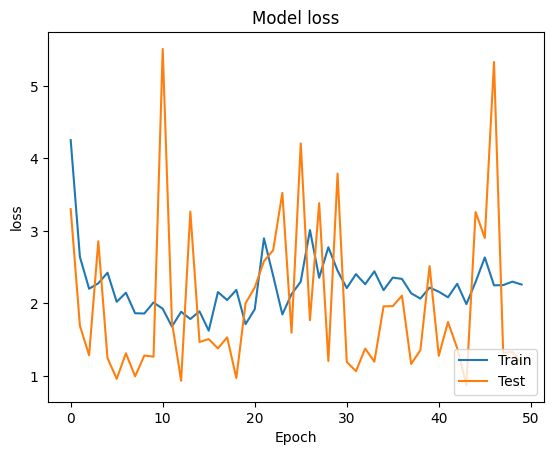

In [22]:
# Membuat plot dari history.loss yang merupakan nilai loss selama pelatihan model
plt.plot(history.history['loss'])

# Membuat plot dari history.val_loss yang merupakan nilai loss selama evaluasi data uji
plt.plot(history.history['val_loss'])

# Menetapkan judul plot sebagai 'Model loss'
plt.title('Model loss')

# Memberi label sumbu y sebagai 'loss'
plt.ylabel('loss')

# Memberi label sumbu x sebagai 'Epoch'
plt.xlabel('Epoch')

# Menambahkan legenda pada plot dengan label 'Train' dan 'Test' yang berada di pojok kanan bawah
plt.legend(['Train', 'Test'], loc='lower right')

# Menampilkan plot
plt.show()


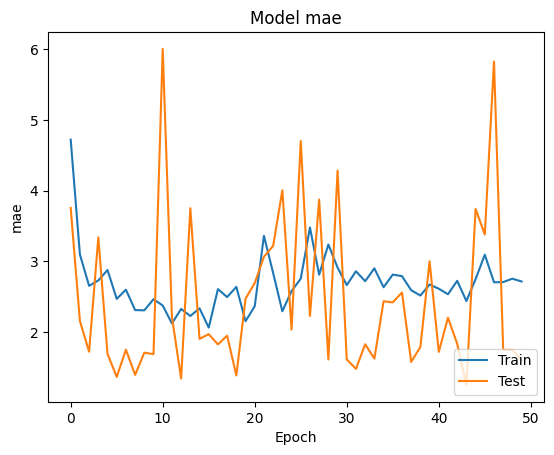

In [23]:
# Membuat plot dari history.mae yang merupakan nilai MAE selama pelatihan model
plt.plot(history.history['mae'])

# Membuat plot dari history.val_mae yang merupakan nilai MAE selama evaluasi data uji
plt.plot(history.history['val_mae'])

# Menetapkan judul plot sebagai 'Model mae'
plt.title('Model mae')

# Memberi label sumbu y sebagai 'mae'
plt.ylabel('mae')

# Memberi label sumbu x sebagai 'Epoch'
plt.xlabel('Epoch')

# Menambahkan legenda pada plot dengan label 'Train' dan 'Test' yang berada di pojok kanan bawah
plt.legend(['Train', 'Test'], loc='lower right')

# Menampilkan plot
plt.show()